# AST 376R - Introduction to Python Part 5
## by Jonathan Florez

# Pandas, Statistical Functions, and Array Sorting

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Pandas

Pandas is a Python data analysis library that consists of a powerful set of tools capable of reading and writing data in different formats (e.g., CSV, txt, Excel, SQL, HDF5), handling data alignment and missing values intelligently, reshaping data sets, merging and joining data sets, etc. Pandas is used in a large number of academic and commercial domains due its flexibility and efficiency in handling large array and data set operations. Although it is not necessarily used to perform statistical functions in Python, it is often used in conjunction with machine learning and advanced statistics algorithms. In the examples below, notice how the usage of Pandas functions vary from functions like those in Numpy. 

### Reading files with Pandas
In this tutorial, we will read in a CSV file named sample_catalog.csv. Each column in this file has a name, so Pandas will automatically assign the corresponding column the correct name based on what is in the file. 

In [15]:
df = pd.read_csv('sample_catalog.csv') ## Reads a csv file

In this example, 'df' is what is known as a Pandas DataFrame. A DataFrame is a 2-dimensional labeled data structure with columns of (potentially) different variable types. This can be somewhat visualized as a stored spreadsheet within Pandas.

The usage is similar for other data types. If you have a .txt file, instead of csv, you can read the file using: pd.read_table('file_name.txt').
Now that we have read in our file into a DataFrame, let's look at what is inside the DataFrame:

In [16]:
df.head() ## Nicely shows the first 5 rows of each column
## Note that df.head(n) shows first n rows of each column

,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MEANFSMGR,ABSRMAG,B_A,DGR,MODELU_J,...,FC,FM16,MORPHEL,LOGMGAS,CCR,MODELU_RCORR,LIMFLAG,MHI_CORR,CZ_collapsed,RESNAME
0,ECO00001,139.374,25.9664,6454.85,10.73,0.135480,-21.8045,0.6407,-0.127258,3.56808,...,1.0,1,L,10.16290,1.00857,1.451260,0,0.0,6454.85,notinresolve
1,ECO00002,185.078,8.5330,4338.92,9.35,0.521721,-19.2834,0.8521,-0.064829,2.89364,...,1.0,1,L,9.29673,1.11393,1.050080,0,0.0,4298.63,notinresolve
2,ECO00003,144.112,9.6060,5443.49,8.19,5.042790,-17.6952,0.7120,-0.143074,1.95172,...,0.0,1,L,9.41119,1.49727,0.818401,0,0.0,5445.68,notinresolve
3,ECO00004,144.992,9.1788,6374.65,8.45,1.849810,-17.4887,0.6203,0.145252,2.57692,...,1.0,1,L,9.32425,1.39795,0.878738,0,0.0,6374.65,notinresolve
4,ECO00005,145.612,10.2190,5713.05,8.81,0.250876,-17.5005,0.5376,0.005840,3.16914,...,1.0,1,E,8.50569,1.27364,1.274670,1,0.0,5682.19,notinresolve


In [17]:
df.tail() ## Shows the last 5 rows of each column

,NAME,RADEG,DEDEG,CZ,LOGMSTAR,MEANFSMGR,ABSRMAG,B_A,DGR,MODELU_J,...,FC,FM16,MORPHEL,LOGMGAS,CCR,MODELU_RCORR,LIMFLAG,MHI_CORR,CZ_collapsed,RESNAME
12693,ECO13821,192.032,3.6333,6955.3,9.19,0.458753,-18.5658,0.8275,0.109270,3.03244,...,1.0,0,L,9.54286,1.06939,1.002770,0,0.0,6951.51,rs1451
12694,ECO13830,208.500,3.2319,7161.1,8.21,4.952240,-17.5104,0.7623,-0.098814,2.18438,...,1.0,0,L,9.36488,1.60133,1.079030,0,0.0,7196.86,rs1460
12695,ECO13831,208.740,3.3686,7245.5,8.21,4.802220,-17.4827,0.5700,-0.186144,1.99374,...,0.0,0,L,9.52670,1.65799,0.894173,0,0.0,7215.61,rs1461
12696,ECO13832,210.894,1.8578,7218.6,8.33,2.817150,-17.4980,0.4711,-0.013983,2.26110,...,1.0,0,L,9.40907,1.52252,0.931854,0,0.0,7192.08,rs1463
12697,ECO13883,139.991,0.8454,5294.2,8.91,0.257259,-17.3713,0.6756,-0.103607,3.50881,...,0.0,0,L,9.21596,1.28559,1.280520,0,0.0,4944.03,rs1518


Notice how the DataFrame looks like a nicely formatted table with strings, floats, and integers. We did not even have to specify what each variable type is. You can look at the column names with the DataFrame.columns function.

Let's look at the individual column names in this data set:

In [18]:
for cols in df.columns:
    print(cols)

NAME
RADEG
DEDEG
CZ
LOGMSTAR
MEANFSMGR
ABSRMAG
B_A
DGR
MODELU_J
MHI
EMHI
CONFUSED
FC
FM16
MORPHEL
LOGMGAS
CCR
MODELU_RCORR
LIMFLAG
MHI_CORR
CZ_collapsed
RESNAME


We can also look at each variable data type in this DataFrame by calling DataFrame.dtypes (e.g., df.dtypes[0] would show the data type of the first variable in the df DataFrame). 
### Question 1:
Make a for loop, similar to the one above, that prints out the column name and data type of each variable inside the df DataFrame.

In [19]:
## Solution below
for i in range(len(df.columns)):
    print(df.columns[i], df.dtypes[i])

NAME object
RADEG float64
DEDEG float64
CZ float64
LOGMSTAR float64
MEANFSMGR float64
ABSRMAG float64
B_A float64
DGR float64
MODELU_J float64
MHI float64
EMHI float64
CONFUSED int64
FC float64
FM16 int64
MORPHEL object
LOGMGAS float64
CCR float64
MODELU_RCORR float64
LIMFLAG int64
MHI_CORR float64
CZ_collapsed float64
RESNAME object


In this example, strings are referred to as 'object', whereas 64-bit floats and integers are referred to as 'float64' and 'int64', respectively.

IF your file does not provide column names, then you will have to assign those on your own. To do this, you simply create an array of strings and supply those to pd.read_table() or pd.read_csv(). Say you are reading a table in with three columns and no column names. You can assign a column each name and read your file by doing the following:

cols = ['x', 'y', 'z']\
df = pd.read_table('file_name.txt',names=cols)

Now, df['x'] will call the 'x' variable


### Writing Files in Pandas

Saving a DataFrame to Pandas in incredibly easy. We can define our own DataFrame, by creating a Python dictionary, and save that to a csv file.

In [20]:
## Save a subset of df to a csv file:

sub_dict = {'Name': df['NAME'], 'RADEG': df['RADEG'], 'DEDEG': df['DEDEG'], 'CZ': df['CZ']}

# sub_dict is now a dictionary. The name of the variable is supplied in the strings, the variable is supplied
# after the colon. Dictonaries are always defined within curly brackets

dfout = pd.DataFrame(sub_dict) ## Define a new DataFrame based on Python Dictionary

dfout.to_csv('sample_out.csv',index_label='Index')

In [21]:
more sample_out.csv

## Statistical Functions in Numpy

Numpy has a large number of functions built for efficiently performing basic statistical operations on arrays. A few useful ones are listed below:

np.mean()\
np.average() - Similar to np.mean, but accepts weights\
np.median()\
np.max()\
np.min()\
np.percentile() - returns the nth percentile value of a distribution

Let's look at some examples using the data we loaded with Pandas

In [22]:
## Calculate the mean, minimum and maximum LOGMSTAR values from our data set.

LOGMSTAR = df['LOGMSTAR']
print("mean:", np.mean(LOGMSTAR), "minimum:", np.min(LOGMSTAR), "maximum:", np.max(LOGMSTAR))


# Now let's say we want to assign weights to our values and calculate
# the weighted average. A weight in statistical terms is defined
# as a coefficient assigned to a number in a computation, for example when 
# determining an average, to make the number's effect on 
# the computation reflect its importance

weights = df['CCR'] ## 'CCR' are the weight coefficients for this data set

print("weighted average:",np.average(LOGMSTAR,weights=weights))

## Let's compute the 5th and 95th percentile values of the LOGMSTAR distribution

print("5th percentile:", np.percentile(LOGMSTAR, 5), "95th percentile:", np.percentile(LOGMSTAR, 95))


mean: 9.399720034651168 minimum: 0.0 maximum: 11.79
weighted average: 9.357937380354086
5th percentile: 8.45 95th percentile: 10.71


### Question 2
Plot a histogram of the variable in the df DataFrame with the name 'LOGMGAS'. On this histogram, plot the 16th and 84th percentile values as vertical dashed lines. Also plot the weighted average as a solid line. Label the x-axis as: $\log(M_{\rm gas}/M_{\odot})$.

You may want to set the limits of the y-axis with the command plt.ylim(top, bottom).

(7.0, 11.0)

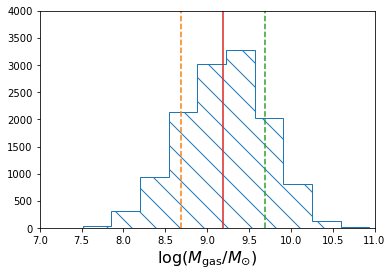

In [23]:
## Solution below

LOGMGAS = df['LOGMGAS']

x1 = np.percentile(LOGMGAS, 16) ##16th percentile
x2 = np.percentile(LOGMGAS, 84) ##16th percentile
mgas_avg = np.average(LOGMGAS, weights=weights)
plt.hist(LOGMGAS, bins=20, histtype='step',hatch='\\')
plt.plot([x1, x1], [0, 5000], ls='--')
plt.plot([x2, x2], [0, 5000], ls='--')
plt.plot([mgas_avg, mgas_avg], [0, 5000])
plt.xlabel(r'$\log(M_{\rm gas} / M_{\odot})$',fontsize=16)
plt.ylim(0,4000)
plt.xlim(7,11)

## Array Sorting

We will now look at how to sort arrays in Python. This will allow you to order arrays by their numerical value in ascending or descending order.

This is a relatively straightforward thing to do in Python. You can sort an array with the following command in Numpy:

sorted_array = np.sort(array)

In [24]:
## Example of np.sort()

rmag = df['ABSRMAG'] # load r-band magnitudes from df 

rmag_sorted = np.sort(rmag)

for r in rmag_sorted:
    print(r)
    

-23.8192
-23.8172
-23.7526
-23.74
-23.7364
-23.5641
-23.5253
-23.4926
-23.4863
-23.2596
-23.2364
-23.2291
-23.1708
-23.1349
-23.1034
-23.103
-23.1018
-23.0971
-23.0928
-23.083000000000002
-23.0808
-22.9935
-22.9604
-22.9481
-22.9459
-22.9431
-22.9367
-22.9321
-22.9099
-22.9087
-22.9047
-22.9036
-22.8972
-22.8805
-22.8749
-22.8598
-22.8461
-22.8185
-22.7942
-22.7835
-22.7807
-22.7749
-22.7582
-22.7478
-22.7403
-22.7369
-22.7353
-22.7162
-22.7086
-22.706
-22.7054
-22.7027
-22.6864
-22.6821
-22.6767
-22.6762
-22.6693
-22.6647
-22.6621
-22.6474
-22.6467
-22.6315
-22.6313
-22.6142
-22.6135
-22.5989
-22.5948
-22.5939
-22.5876
-22.5841
-22.5645
-22.5537
-22.5476
-22.5415
-22.5217
-22.5184
-22.5144
-22.511999999999997
-22.5094
-22.4988
-22.4981
-22.4935
-22.4896
-22.4894
-22.4887
-22.4876
-22.4798
-22.4744
-22.4713
-22.4701
-22.4657
-22.456999999999997
-22.4548
-22.4477
-22.4444
-22.444000000000003
-22.4336
-22.4277
-22.4276
-22.4235
-22.4213
-22.4182
-22.4158
-22.4113
-22.3989
-22.3981
-22.39

-20.6903
-20.69
-20.6898
-20.6893
-20.6876
-20.686999999999998
-20.6867
-20.6855
-20.6853
-20.6841
-20.6838
-20.6837
-20.6835
-20.6832
-20.683000000000003
-20.680999999999997
-20.6808
-20.6806
-20.6803
-20.6794
-20.6784
-20.6781
-20.678
-20.6762
-20.6753
-20.6748
-20.6725
-20.6723
-20.671999999999997
-20.6711
-20.6704
-20.6701
-20.6692
-20.6687
-20.6683
-20.6681
-20.6681
-20.668000000000003
-20.668000000000003
-20.6678
-20.6676
-20.6667
-20.6666
-20.6661
-20.6656
-20.6656
-20.6643
-20.6643
-20.6641
-20.6633
-20.6629
-20.6626
-20.6626
-20.6606
-20.6605
-20.6602
-20.66
-20.6586
-20.6581
-20.6581
-20.6575
-20.6565
-20.6563
-20.6562
-20.6554
-20.6548
-20.6538
-20.6534
-20.6531
-20.6523
-20.6518
-20.6518
-20.6518
-20.651
-20.6509
-20.6507
-20.6507
-20.65
-20.6497
-20.6496
-20.6482
-20.6475
-20.6468
-20.6467
-20.6461
-20.6457
-20.6454
-20.6447
-20.6435
-20.6435
-20.6404
-20.6399
-20.6397
-20.6386
-20.6382
-20.6367
-20.6358
-20.6346
-20.6344
-20.634
-20.634
-20.6329
-20.6318
-20.6309
-20.6308

-20.003
-20.0025
-20.0011
-20.000999999999998
-20.0008
-20.0004
-20.0003
-19.9999
-19.9983
-19.9981
-19.9971
-19.9968
-19.9962
-19.9962
-19.996
-19.9956
-19.9955
-19.9946
-19.9945
-19.9942
-19.9941
-19.9931
-19.9929
-19.9922
-19.9919
-19.9914
-19.9912
-19.9909
-19.9908
-19.9908
-19.9899
-19.989
-19.9886
-19.9883
-19.9876
-19.9875
-19.9873
-19.9871
-19.9862
-19.9858
-19.9856
-19.9849
-19.9845
-19.9842
-19.9839
-19.9838
-19.9837
-19.9835
-19.9834
-19.9826
-19.9825
-19.9824
-19.9823
-19.9823
-19.982
-19.9819
-19.9817
-19.9817
-19.9813
-19.9812
-19.9808
-19.9801
-19.9797
-19.9789
-19.9789
-19.9781
-19.9772
-19.9771
-19.977
-19.9769
-19.9767
-19.9767
-19.9762
-19.9759
-19.9758
-19.9757
-19.9753
-19.9752
-19.975
-19.9743
-19.973
-19.9726
-19.9725
-19.9724
-19.9714
-19.9709
-19.9705
-19.9705
-19.9699
-19.9697
-19.9694
-19.9676
-19.9674
-19.9671
-19.967
-19.9669
-19.9659
-19.9649
-19.9648
-19.9647
-19.9646
-19.9642
-19.9628
-19.9625
-19.9622
-19.9614
-19.961
-19.9606
-19.9598
-19.9593
-19.9587

-19.4459
-19.4458
-19.4455
-19.4442
-19.4441
-19.4441
-19.4438
-19.4437
-19.4436
-19.4435
-19.4432
-19.442999999999998
-19.4421
-19.4413
-19.4409
-19.4403
-19.4401
-19.4394
-19.4386
-19.4385
-19.4381
-19.438
-19.4379
-19.4379
-19.4376
-19.4375
-19.4368
-19.4364
-19.4363
-19.4362
-19.4361
-19.4356
-19.4356
-19.4353
-19.435
-19.4345
-19.4334
-19.4331
-19.4317
-19.4314
-19.4311
-19.430999999999997
-19.430999999999997
-19.4308
-19.4307
-19.4307
-19.4306
-19.4304
-19.4292
-19.4287
-19.4277
-19.4277
-19.4275
-19.427
-19.4266
-19.4264
-19.4263
-19.426
-19.4256
-19.4253
-19.4252
-19.4247
-19.4246
-19.4245
-19.4244
-19.4235
-19.4233
-19.4229
-19.4223
-19.4203
-19.4196
-19.4188
-19.4186
-19.4184
-19.4181
-19.4177
-19.4174
-19.4174
-19.4169
-19.4169
-19.4158
-19.4156
-19.4152
-19.4151
-19.415
-19.4148
-19.4148
-19.4145
-19.4144
-19.4141
-19.4139
-19.4138
-19.4134
-19.4131
-19.4129
-19.4128
-19.4127
-19.4124
-19.4124
-19.4121
-19.410999999999998
-19.410999999999998
-19.4098
-19.4098
-19.4091
-19.4

-18.9404
-18.9397
-18.9395
-18.9391
-18.9388
-18.9382
-18.9379
-18.9373
-18.9373
-18.9371
-18.9368
-18.9366
-18.9365
-18.9364
-18.9364
-18.9351
-18.9348
-18.9344
-18.9336
-18.9324
-18.9322
-18.9318
-18.9315
-18.9312
-18.9311
-18.9307
-18.9299
-18.9294
-18.9293
-18.9289
-18.9288
-18.9288
-18.9287
-18.9279
-18.9276
-18.9275
-18.9274
-18.9274
-18.9273
-18.9271
-18.9271
-18.9267
-18.9263
-18.9261
-18.9261
-18.926
-18.9258
-18.9258
-18.9257
-18.9253
-18.9253
-18.9251
-18.925
-18.9247
-18.9246
-18.9241
-18.924
-18.9239
-18.9238
-18.9238
-18.9238
-18.9237
-18.923
-18.9228
-18.9219
-18.9216
-18.9215
-18.9209
-18.9206
-18.9202
-18.9201
-18.9195
-18.9195
-18.9194
-18.9192
-18.9189
-18.9189
-18.9189
-18.9186
-18.9178
-18.9169
-18.9161
-18.916
-18.9158
-18.9156
-18.9155
-18.9155
-18.9152
-18.9152
-18.9151
-18.9151
-18.9151
-18.9135
-18.9133
-18.9128
-18.9122
-18.9122
-18.9119
-18.9117
-18.9109
-18.9108
-18.9106
-18.9101
-18.9101
-18.9099
-18.9091
-18.9081
-18.9078
-18.9077
-18.9075
-18.907
-18.906

-18.4851
-18.484
-18.4839
-18.4839
-18.4838
-18.4838
-18.4834
-18.4831
-18.4828
-18.4826
-18.4825
-18.4824
-18.482
-18.4816
-18.4812
-18.480999999999998
-18.4809
-18.4804
-18.4798
-18.4797
-18.4795
-18.4795
-18.4793
-18.479
-18.479
-18.479
-18.4788
-18.4786
-18.4785
-18.4785
-18.4775
-18.4774
-18.4773
-18.4773
-18.4772
-18.4771
-18.4771
-18.477
-18.4769
-18.4768
-18.4766
-18.4766
-18.4766
-18.4761
-18.4756
-18.4754
-18.4752
-18.4744
-18.4739
-18.4737
-18.4735
-18.4731
-18.473
-18.4728
-18.4724
-18.472
-18.4713
-18.471
-18.4705
-18.4704
-18.4696
-18.4696
-18.4695
-18.4694
-18.4694
-18.4687
-18.4684
-18.4684
-18.4683
-18.4681
-18.4679
-18.4678
-18.4677
-18.4676
-18.4674
-18.4672
-18.4668
-18.4664
-18.4659
-18.4654
-18.4651
-18.4649
-18.4649
-18.4644
-18.4643
-18.4642
-18.4642
-18.4635
-18.4635
-18.4632
-18.4632
-18.4628
-18.4623
-18.462
-18.462
-18.4618
-18.4615
-18.461
-18.4609
-18.4604
-18.4603
-18.4602
-18.4598
-18.4596
-18.4594
-18.4593
-18.4589
-18.4586
-18.4586
-18.4581
-18.458
-18

-18.0896
-18.0889
-18.0889
-18.0888
-18.088
-18.0879
-18.0876
-18.0876
-18.0873
-18.087
-18.0869
-18.0862
-18.0859
-18.0859
-18.0855
-18.085
-18.0846
-18.0844
-18.0844
-18.084
-18.0839
-18.0839
-18.0837
-18.0837
-18.0819
-18.0819
-18.0813
-18.0811
-18.081
-18.0808
-18.0803
-18.0802
-18.0802
-18.0791
-18.079
-18.0786
-18.0776
-18.0776
-18.0773
-18.0769
-18.0766
-18.0765
-18.0763
-18.0762
-18.0762
-18.076
-18.075
-18.0743
-18.0741
-18.0728
-18.0728
-18.0726
-18.0721
-18.072
-18.0717
-18.0711
-18.070999999999998
-18.070999999999998
-18.0708
-18.0708
-18.0707
-18.0705
-18.0704
-18.0704
-18.0703
-18.07
-18.0698
-18.0696
-18.0692
-18.0689
-18.0688
-18.0687
-18.0684
-18.0681
-18.0679
-18.0678
-18.0675
-18.0673
-18.0671
-18.0669
-18.0662
-18.0661
-18.0659
-18.0656
-18.0651
-18.0649
-18.0647
-18.0641
-18.0639
-18.0636
-18.0635
-18.0631
-18.0625
-18.0622
-18.0622
-18.0621
-18.062
-18.0619
-18.0615
-18.0614
-18.0613
-18.061
-18.0609
-18.0607
-18.0606
-18.0605
-18.0597
-18.0595
-18.0591
-18.0587
-

-17.7517
-17.7516
-17.7513
-17.7511
-17.7509
-17.7508
-17.7507
-17.7505
-17.7505
-17.7502
-17.7501
-17.7497
-17.7489
-17.7485
-17.7484
-17.7483
-17.748
-17.7479
-17.7465
-17.7458
-17.7453
-17.7451
-17.7449
-17.7449
-17.7446
-17.7439
-17.7434
-17.7432
-17.7424
-17.7424
-17.742
-17.7419
-17.7419
-17.7419
-17.7415
-17.7407
-17.7407
-17.7404
-17.7403
-17.7402
-17.74
-17.7398
-17.7396
-17.7396
-17.7392
-17.739
-17.7388
-17.7387
-17.7385
-17.7384
-17.7384
-17.738
-17.7374
-17.7372
-17.7368
-17.7367
-17.7367
-17.7367
-17.7365
-17.7359
-17.7355
-17.7354
-17.7353
-17.735
-17.735
-17.7348
-17.7348
-17.7348
-17.7347
-17.7341
-17.734
-17.7339
-17.7338
-17.7331
-17.733
-17.7329
-17.7329
-17.7327
-17.7327
-17.7326
-17.7324
-17.732
-17.7313
-17.7311
-17.730999999999998
-17.7308
-17.7307
-17.7306
-17.7305
-17.7305
-17.7304
-17.73
-17.7298
-17.7298
-17.7293
-17.7293
-17.7292
-17.7287
-17.7286
-17.7285
-17.7284
-17.7279
-17.7279
-17.7279
-17.7278
-17.7275
-17.727
-17.7269
-17.7267
-17.7265
-17.7263
-17.

-17.4277
-17.4276
-17.4272
-17.4271
-17.4263
-17.4262
-17.4261
-17.426
-17.4259
-17.4254
-17.4252
-17.4252
-17.4251
-17.4251
-17.425
-17.425
-17.4247
-17.4246
-17.4244
-17.4242
-17.4242
-17.424
-17.424
-17.4234
-17.4232
-17.423
-17.4229
-17.4229
-17.4228
-17.4225
-17.4225
-17.4224
-17.4221
-17.4219
-17.4219
-17.4217
-17.4214
-17.421
-17.4205
-17.4205
-17.4204
-17.4197
-17.4197
-17.4196
-17.4191
-17.4191
-17.4189
-17.4184
-17.4183
-17.4183
-17.4183
-17.4182
-17.4181
-17.4177
-17.4168
-17.4167
-17.4162
-17.4162
-17.4161
-17.4157
-17.4157
-17.4156
-17.4155
-17.4154
-17.4153
-17.4152
-17.4148
-17.4147
-17.4147
-17.4146
-17.4135
-17.4129
-17.4129
-17.4128
-17.4118
-17.4116
-17.4116
-17.4114
-17.4111
-17.4109
-17.4107
-17.4105
-17.4103
-17.4097
-17.4092
-17.4091
-17.4089
-17.4087
-17.4085
-17.4085
-17.4084
-17.4081
-17.4079
-17.4078
-17.4077
-17.4072
-17.4068
-17.4064
-17.4063
-17.4061
-17.4061
-17.406
-17.4059
-17.4058
-17.4055
-17.4055
-17.4054
-17.4053
-17.4052
-17.4052
-17.4052
-17.4051


A more useful function than np.sort is the np.argsort() function which returns the indices of the sorted array, rather than the sorted array itself. This essentially allows you to sort an entire table or 2-dimensional array based on the numerical values of one variable. Note that you will have to do this for HW 4!

In [25]:
## Example of np.argsort()

sort_ind = np.argsort(rmag) #returns the indices of the rmag array once sorted. 

## Above, we got rmag_sorted by defining it as: 'rmag_sorted = np.sort(rmag)'
## We can get the same array with argsort:

new_rmag_sorted = rmag[sort_ind]

for r in new_rmag_sorted:
    print(r)


-23.8192
-23.8172
-23.7526
-23.74
-23.7364
-23.5641
-23.5253
-23.4926
-23.4863
-23.2596
-23.2364
-23.2291
-23.1708
-23.1349
-23.1034
-23.103
-23.1018
-23.0971
-23.0928
-23.083000000000002
-23.0808
-22.9935
-22.9604
-22.9481
-22.9459
-22.9431
-22.9367
-22.9321
-22.9099
-22.9087
-22.9047
-22.9036
-22.8972
-22.8805
-22.8749
-22.8598
-22.8461
-22.8185
-22.7942
-22.7835
-22.7807
-22.7749
-22.7582
-22.7478
-22.7403
-22.7369
-22.7353
-22.7162
-22.7086
-22.706
-22.7054
-22.7027
-22.6864
-22.6821
-22.6767
-22.6762
-22.6693
-22.6647
-22.6621
-22.6474
-22.6467
-22.6315
-22.6313
-22.6142
-22.6135
-22.5989
-22.5948
-22.5939
-22.5876
-22.5841
-22.5645
-22.5537
-22.5476
-22.5415
-22.5217
-22.5184
-22.5144
-22.511999999999997
-22.5094
-22.4988
-22.4981
-22.4935
-22.4896
-22.4894
-22.4887
-22.4876
-22.4798
-22.4744
-22.4713
-22.4701
-22.4657
-22.456999999999997
-22.4548
-22.4477
-22.4444
-22.444000000000003
-22.4336
-22.4277
-22.4276
-22.4235
-22.4213
-22.4182
-22.4158
-22.4113
-22.3989
-22.3981
-22.39

-21.1366
-21.136
-21.1358
-21.1356
-21.1354
-21.1352
-21.1348
-21.1343
-21.1339
-21.1334
-21.1331
-21.1323
-21.1317
-21.1306
-21.13
-21.13
-21.1294
-21.1294
-21.1287
-21.1283
-21.1283
-21.1272
-21.1271
-21.1267
-21.1265
-21.1257
-21.1252
-21.125
-21.1249
-21.1247
-21.1242
-21.1231
-21.123
-21.1217
-21.1205
-21.1197
-21.1196
-21.1195
-21.1187
-21.1178
-21.1177
-21.1165
-21.116
-21.1155
-21.1147
-21.1146
-21.1139
-21.1137
-21.1123
-21.11
-21.1082
-21.1081
-21.1078
-21.1076
-21.1076
-21.107
-21.1054
-21.1045
-21.1043
-21.1038
-21.1026
-21.1022
-21.1016
-21.1016
-21.1013
-21.1009
-21.0999
-21.0994
-21.0994
-21.0974
-21.0973
-21.095
-21.0946
-21.0943
-21.0942
-21.0942
-21.0934
-21.0927
-21.0924
-21.0906
-21.0902
-21.0897
-21.0896
-21.0892
-21.089000000000002
-21.0874
-21.0873
-21.0863
-21.0852
-21.0851
-21.0845
-21.0843
-21.0836
-21.0835
-21.0832
-21.0823
-21.0813
-21.0809
-21.0805
-21.0797
-21.0793
-21.0785
-21.0784
-21.0781
-21.0776
-21.0767
-21.0758
-21.0739
-21.0723
-21.0714
-21.0703
-2

-20.5304
-20.5301
-20.5299
-20.5297
-20.5285
-20.5275
-20.5268
-20.5263
-20.5261
-20.5255
-20.5249
-20.5239
-20.5238
-20.5216
-20.5213
-20.5199
-20.5194
-20.5191
-20.5189
-20.5187
-20.5183
-20.518
-20.518
-20.5177
-20.5162
-20.516
-20.5149
-20.5149
-20.5147
-20.5145
-20.5145
-20.5143
-20.5143
-20.5142
-20.514
-20.5138
-20.5125
-20.5119
-20.5117
-20.5115
-20.5106
-20.5104
-20.5099
-20.5097
-20.5081
-20.5081
-20.5073
-20.5068
-20.5067
-20.5067
-20.5063
-20.506
-20.5059
-20.5056
-20.5052
-20.5051
-20.5049
-20.5048
-20.5042
-20.5041
-20.504
-20.5035
-20.5027
-20.5027
-20.5026
-20.5023
-20.5022
-20.5016
-20.5016
-20.5013
-20.5009
-20.4997
-20.4993
-20.4977
-20.4974
-20.4974
-20.4972
-20.4972
-20.497
-20.4969
-20.4969
-20.4966
-20.4966
-20.4963
-20.4962
-20.4958
-20.4951
-20.4945
-20.4944
-20.4944
-20.4943
-20.4942
-20.4941
-20.4939
-20.4922
-20.4916
-20.4912
-20.4907
-20.4901
-20.4894
-20.4888
-20.4887
-20.4886
-20.4886
-20.488000000000003
-20.4876
-20.4873
-20.486
-20.4859
-20.4856
-20.485

-19.889
-19.8889
-19.8886
-19.8885
-19.8885
-19.8884
-19.8876
-19.8873
-19.8872
-19.8868
-19.8862
-19.8861
-19.8861
-19.8861
-19.8859
-19.8848
-19.8846
-19.8834
-19.8827
-19.8822
-19.8821
-19.882
-19.8817
-19.8815
-19.8812
-19.881
-19.8807
-19.8806
-19.8806
-19.8804
-19.8803
-19.8803
-19.8802
-19.8792
-19.879
-19.8789
-19.8787
-19.8787
-19.8785
-19.8778
-19.8775
-19.8772
-19.8766
-19.8763
-19.8762
-19.8761
-19.8754
-19.8753
-19.8753
-19.875
-19.8748
-19.8745
-19.874000000000002
-19.8738
-19.8735
-19.8735
-19.8735
-19.8734
-19.8731
-19.8726
-19.8722
-19.8707
-19.8704
-19.8703
-19.8701
-19.8699
-19.8696
-19.8695
-19.8695
-19.869
-19.8683
-19.8682
-19.868
-19.8675
-19.8674
-19.8662
-19.866
-19.866
-19.8654
-19.8646
-19.8644
-19.8641
-19.8635
-19.8629
-19.8627
-19.862000000000002
-19.8617
-19.8614
-19.8612
-19.8607
-19.8607
-19.8601
-19.8599
-19.8595
-19.8593
-19.8591
-19.8587
-19.8581
-19.8577
-19.857
-19.8567
-19.8567
-19.8566
-19.8564
-19.8563
-19.8561
-19.855999999999998
-19.8559
-19.8

-19.3433
-19.3431
-19.3431
-19.343
-19.3425
-19.3425
-19.3424
-19.3409
-19.3405
-19.3401
-19.3398
-19.3395
-19.3386
-19.3385
-19.3383
-19.3381
-19.3381
-19.3378
-19.3377
-19.3373
-19.3366
-19.3363
-19.3361
-19.3355
-19.3355
-19.335
-19.3349
-19.3341
-19.3339
-19.3334
-19.3333
-19.333
-19.3329
-19.3328
-19.3327
-19.3325
-19.3322
-19.3321
-19.3305
-19.3301
-19.3299
-19.3295
-19.3291
-19.329
-19.3283
-19.328
-19.3272
-19.3263
-19.326
-19.3259
-19.3253
-19.3245
-19.324
-19.3238
-19.3235
-19.3229
-19.3229
-19.3228
-19.3226
-19.3222
-19.3218
-19.3217
-19.3215
-19.3206
-19.3203
-19.3198
-19.3196
-19.3196
-19.3195
-19.3182
-19.3182
-19.3176
-19.3175
-19.3175
-19.3174
-19.3173
-19.3171
-19.3157
-19.3152
-19.315
-19.315
-19.3149
-19.3149
-19.3145
-19.3141
-19.3138
-19.3136
-19.3135
-19.3131
-19.3131
-19.3125
-19.3124
-19.3122
-19.3116
-19.3111
-19.311
-19.3108
-19.3106
-19.3101
-19.31
-19.3093
-19.3092
-19.3092
-19.309
-19.3089
-19.3088
-19.3085
-19.3084
-19.3074
-19.3074
-19.3066
-19.3061
-19.3

-18.8433
-18.8431
-18.8424
-18.8421
-18.8419
-18.8415
-18.8413
-18.8407
-18.8397
-18.8395
-18.8391
-18.8391
-18.839000000000002
-18.8388
-18.8388
-18.8385
-18.8385
-18.8383
-18.8381
-18.8377
-18.8376
-18.8373
-18.8372
-18.8371
-18.8362
-18.8359
-18.8357
-18.8355
-18.8354
-18.8353
-18.8351
-18.8339
-18.8339
-18.8335
-18.833
-18.8329
-18.8328
-18.8324
-18.8323
-18.8316
-18.8315
-18.8298
-18.8294
-18.8294
-18.8293
-18.8291
-18.829
-18.829
-18.829
-18.8286
-18.8285
-18.8282
-18.8281
-18.8278
-18.8277
-18.8275
-18.8275
-18.8273
-18.8265
-18.8263
-18.8261
-18.826
-18.826
-18.8259
-18.8254
-18.8252
-18.8251
-18.8249
-18.8232
-18.8232
-18.823
-18.8228
-18.8222
-18.8216
-18.8212
-18.820999999999998
-18.8207
-18.8203
-18.8202
-18.82
-18.82
-18.8196
-18.819000000000003
-18.819000000000003
-18.8182
-18.8181
-18.8181
-18.817999999999998
-18.8173
-18.8169
-18.8169
-18.8166
-18.8166
-18.8164
-18.8163
-18.8163
-18.8158
-18.8153
-18.8137
-18.8134
-18.8133
-18.8131
-18.813
-18.813
-18.8129
-18.8128
-18.

-18.4118
-18.4113
-18.4105
-18.4099
-18.4099
-18.4093
-18.4093
-18.4091
-18.409000000000002
-18.4089
-18.4089
-18.4086
-18.4063
-18.4063
-18.4063
-18.406
-18.4059
-18.4054
-18.4051
-18.404
-18.404
-18.404
-18.4035
-18.4034
-18.403
-18.403
-18.4029
-18.4029
-18.4026
-18.4024
-18.4017
-18.4016
-18.4013
-18.4001
-18.4
-18.3992
-18.3991
-18.3986
-18.3982
-18.398
-18.3979
-18.3979
-18.3978
-18.3977
-18.3977
-18.3971
-18.3956
-18.3955
-18.3953
-18.3949
-18.3935
-18.3933
-18.3929
-18.3918
-18.3915
-18.3911
-18.391
-18.3909
-18.3907
-18.3901
-18.3894
-18.3892
-18.3886
-18.3883
-18.3883
-18.3879
-18.3879
-18.3878
-18.3877
-18.3871
-18.3871
-18.3867
-18.3864
-18.3862
-18.3861
-18.3846
-18.3844
-18.3843
-18.3841
-18.3836
-18.3833
-18.3829
-18.3827
-18.3821
-18.3803
-18.3799
-18.3799
-18.3794
-18.3788
-18.3787
-18.3787
-18.3786
-18.3781
-18.378
-18.3768
-18.3767
-18.3765
-18.3763
-18.3762
-18.375999999999998
-18.3756
-18.3751
-18.375
-18.375
-18.3746
-18.3746
-18.3745
-18.3745
-18.374000000000002


-18.0226
-18.0221
-18.0216
-18.021
-18.0207
-18.0202
-18.0201
-18.02
-18.0197
-18.0192
-18.0191
-18.0187
-18.0187
-18.0185
-18.0181
-18.018
-18.0175
-18.0174
-18.0174
-18.0173
-18.0172
-18.0171
-18.0167
-18.0166
-18.0164
-18.0157
-18.0153
-18.0142
-18.0139
-18.0134
-18.0131
-18.0129
-18.0129
-18.0123
-18.0116
-18.0114
-18.0111
-18.0108
-18.0107
-18.0107
-18.0107
-18.0106
-18.0106
-18.0105
-18.0103
-18.0102
-18.0101
-18.0095
-18.0095
-18.0093
-18.0092
-18.0092
-18.0092
-18.0086
-18.0086
-18.0085
-18.0085
-18.0084
-18.0083
-18.008
-18.0079
-18.0076
-18.0075
-18.0075
-18.0071
-18.007
-18.0065
-18.0065
-18.0065
-18.0064
-18.0061
-18.006
-18.0059
-18.0055
-18.0051
-18.005
-18.005
-18.0049
-18.0044
-18.0043
-18.0042
-18.0042
-18.0041
-18.004
-18.0036
-18.0034
-18.0028
-18.0027
-18.0024
-18.002
-18.0018
-18.0016
-18.0012
-18.0009
-18.0009
-18.0008
-18.0006
-18.0006
-18.0005
-18.0001
-18.0
-17.9999
-17.9995
-17.9987
-17.9987
-17.9984
-17.9981
-17.9978
-17.9974
-17.9973
-17.9969
-17.9968
-17.99

-17.6909
-17.6909
-17.6907
-17.6905
-17.6901
-17.6899
-17.6895
-17.6892
-17.6891
-17.6889
-17.6888
-17.6885
-17.6884
-17.6882
-17.688
-17.6879
-17.6875
-17.6875
-17.6868
-17.6865
-17.6862
-17.6859
-17.6855
-17.6852
-17.685
-17.6849
-17.6846
-17.6842
-17.6839
-17.6837
-17.6833
-17.6829
-17.6822
-17.682000000000002
-17.6818
-17.6816
-17.6816
-17.6815
-17.6815
-17.6809
-17.6807
-17.6803
-17.6802
-17.6798
-17.6797
-17.6796
-17.6796
-17.6792
-17.6792
-17.6789
-17.6789
-17.6784
-17.678
-17.6777
-17.6776
-17.6773
-17.6772
-17.6771
-17.677
-17.677
-17.6768
-17.6768
-17.6767
-17.6766
-17.6765
-17.6764
-17.6764
-17.6762
-17.6761
-17.676
-17.6759
-17.6756
-17.6754
-17.6751
-17.675
-17.6749
-17.6749
-17.6748
-17.6747
-17.6746
-17.6742
-17.6738
-17.6738
-17.6732
-17.6731
-17.6731
-17.6728
-17.6727
-17.6726
-17.6725
-17.6725
-17.6718
-17.6718
-17.6715
-17.6713
-17.6711
-17.6709
-17.6708
-17.6703
-17.6702
-17.6701
-17.6697
-17.6697
-17.6693
-17.6692
-17.6691
-17.669
-17.669
-17.6689
-17.6684
-17.6682

-17.3561
-17.355999999999998
-17.3559
-17.3557
-17.3553
-17.3549
-17.3548
-17.3546
-17.3545
-17.3543
-17.3542
-17.354
-17.3536
-17.3532
-17.3531
-17.3525
-17.3523
-17.3522
-17.3521
-17.3519
-17.3518
-17.3515
-17.3513
-17.351
-17.3503
-17.3502
-17.3502
-17.35
-17.3499
-17.3493
-17.3492
-17.3489
-17.3488
-17.3487
-17.3487
-17.3486
-17.3485
-17.348
-17.3479
-17.3478
-17.3477
-17.3474
-17.3473
-17.3466
-17.3462
-17.3459
-17.3458
-17.3454
-17.3444
-17.3444
-17.3441
-17.3441
-17.3434
-17.343
-17.3425
-17.3415
-17.3415
-17.3414
-17.3413
-17.3412
-17.3409
-17.3408
-17.3408
-17.3407
-17.3406
-17.3404
-17.3402
-17.3402
-17.34
-17.3399
-17.3398
-17.3397
-17.3396
-17.3394
-17.3393
-17.339000000000002
-17.3381
-17.3381
-17.338
-17.3375
-17.3375
-17.3372
-17.3371
-17.3368
-17.3366
-17.3366
-17.3364
-17.3363
-17.3363
-17.3363
-17.3361
-17.3355
-17.3351
-17.3349
-17.3345
-17.3345
-17.3343
-17.3341
-17.3336
-17.3333
-17.3333
-17.333
-17.3323
-17.3323
-17.332
-17.332
-17.3319
-17.3307
-17.3304


### Question 3
The 'CZ' parameter in this catalog is a recessional velocity. It is calculated as the speed of light times redshift (c*z). The larger an object's recessional velocity is, the further away that object is. For this problem, sort the values of 'NAME', 'RADEG', 'DEDEG', 'CZ', and 'LOGMSTAR' by recessional velocity such that object closest to us is the first object in each array, and the object furthest from us is the last object in each array.

Create a dictionary with these sorted values, convert that dictionary into a DataFrame, and write that out to a CSV file named 'Q3_out.csv'. This file will have the columns 'NAME', 'RADEG', 'DEDEG', 'CZ', and 'LOGMSTAR.'

In [29]:
## Solution below
CZ = df['CZ']
NAME = df['NAME']
RADEG = df['RADEG']
DEDEG = df['DEDEG']

sort_ind = np.argsort(CZ)

sav_dict = {'Name': NAME[sort_ind], 'RADEG': RADEG[sort_ind], 'DEDEG': DEDEG[sort_ind],
           'CZ': CZ[sort_ind], 'LOGMSTAR': LOGMSTAR[sort_ind]}

dfout = pd.DataFrame(sav_dict)
dfout.to_csv('Q3_out.csv',index_label='Index')

In [30]:
more Q3_out.csv

In [31]:
dfout.head()

,Name,RADEG,DEDEG,CZ,LOGMSTAR
3395,ECO03420,182.969,24.1239,2532.79,10.17
12401,ECO12433,208.146,38.7052,2533.41,8.89
3421,ECO03446,183.460,7.2008,2533.72,10.31
12101,ECO12133,172.350,34.8711,2535.21,8.73
5647,ECO05672,173.355,34.0721,2538.08,9.07
